<a href="https://colab.research.google.com/github/moridin04/CCADMACL-Research/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install lime
!pip install scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import lime
import lime.lime_tabular

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import VotingClassifier
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.neighbors import LocalOutlierFactor

In [3]:
cfd = pd.read_csv('creditcard.csv')

cfd

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [4]:
print(f"Shape:  {cfd.shape}\n")
print(f"Columns:  {cfd.columns}\n")
print(f"Null Values:  \n{cfd.isnull().sum()}\n")
print(f"Data Types: \n{cfd.dtypes}")

print(cfd.describe(include='all'))

Shape:  (284807, 31)

Columns:  Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Null Values:  
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Data Types: 
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64


Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


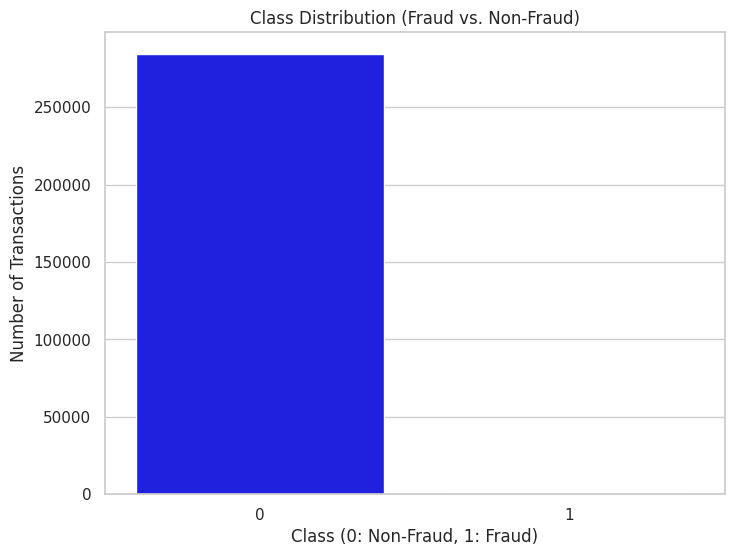

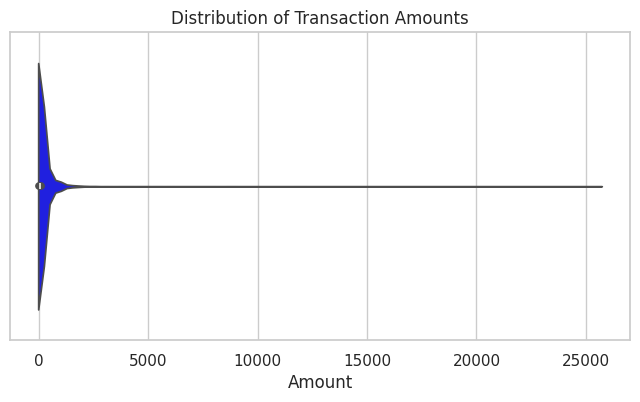

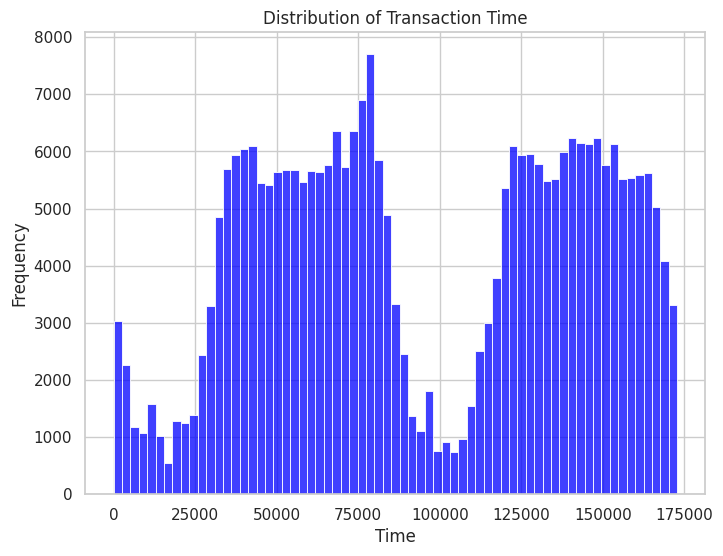

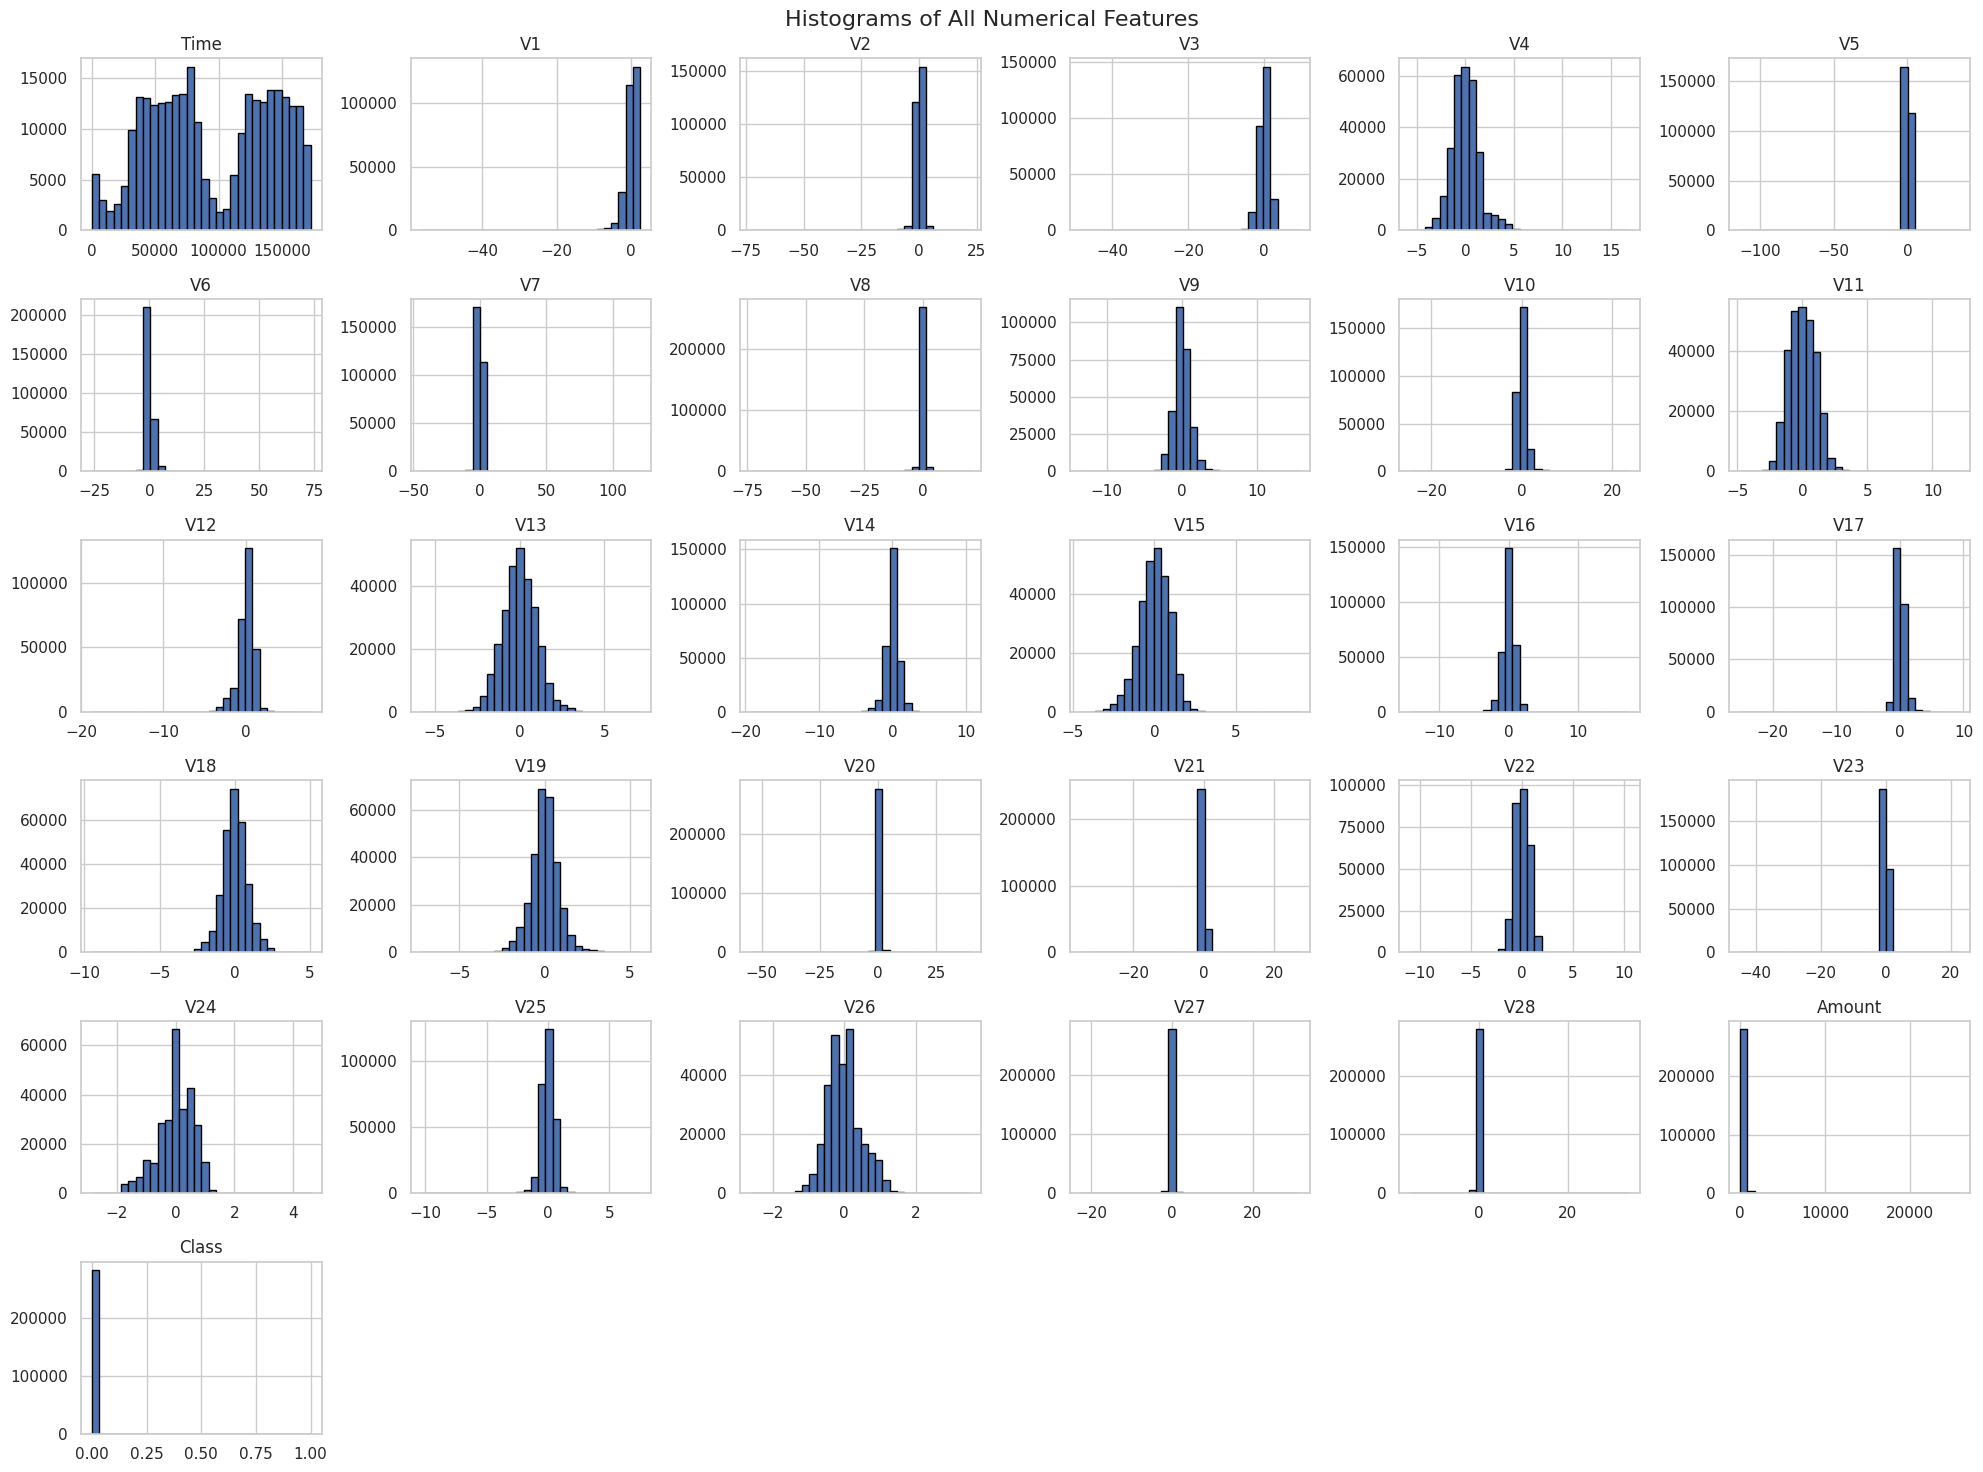

In [5]:
class_distribution = cfd['Class'].value_counts()
print("Class Distribution:")
print(class_distribution)

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=cfd, hue='Class', palette=['blue', 'red'], legend=False)
plt.title('Class Distribution (Fraud vs. Non-Fraud)')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Number of Transactions')
plt.show()

plt.figure(figsize=(8, 4))
sns.violinplot(x=cfd["Amount"], color="blue")
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(cfd['Time'], kde=False, color="blue")
plt.title('Distribution of Transaction Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

cfd.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle("Histograms of All Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


In [6]:
print("\nChecking for Null Values:")
cfd.isnull().sum()

Q1 = cfd['Amount'].quantile(0.25)
Q3 = cfd['Amount'].quantile(0.75)
IQR = Q3 - Q1

outliers = cfd[(cfd['Amount'] < (Q1 - 1.5 * IQR)) | (cfd['Amount'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers in 'Amount': {len(outliers)}")

cfd.duplicated()

duplicate_counts = cfd.duplicated().value_counts()
print(duplicate_counts)

duplicate_counts = cfd.duplicated().value_counts()
print("Duplicate Counts before removal:\n", duplicate_counts)

cfd = cfd.drop_duplicates(keep='first')

duplicate_counts = cfd.duplicated().value_counts()
print("\nDuplicate Counts after removal:\n", duplicate_counts)


Checking for Null Values:
Number of outliers in 'Amount': 31904
False    283726
True       1081
Name: count, dtype: int64
Duplicate Counts before removal:
 False    283726
True       1081
Name: count, dtype: int64

Duplicate Counts after removal:
 False    283726
Name: count, dtype: int64


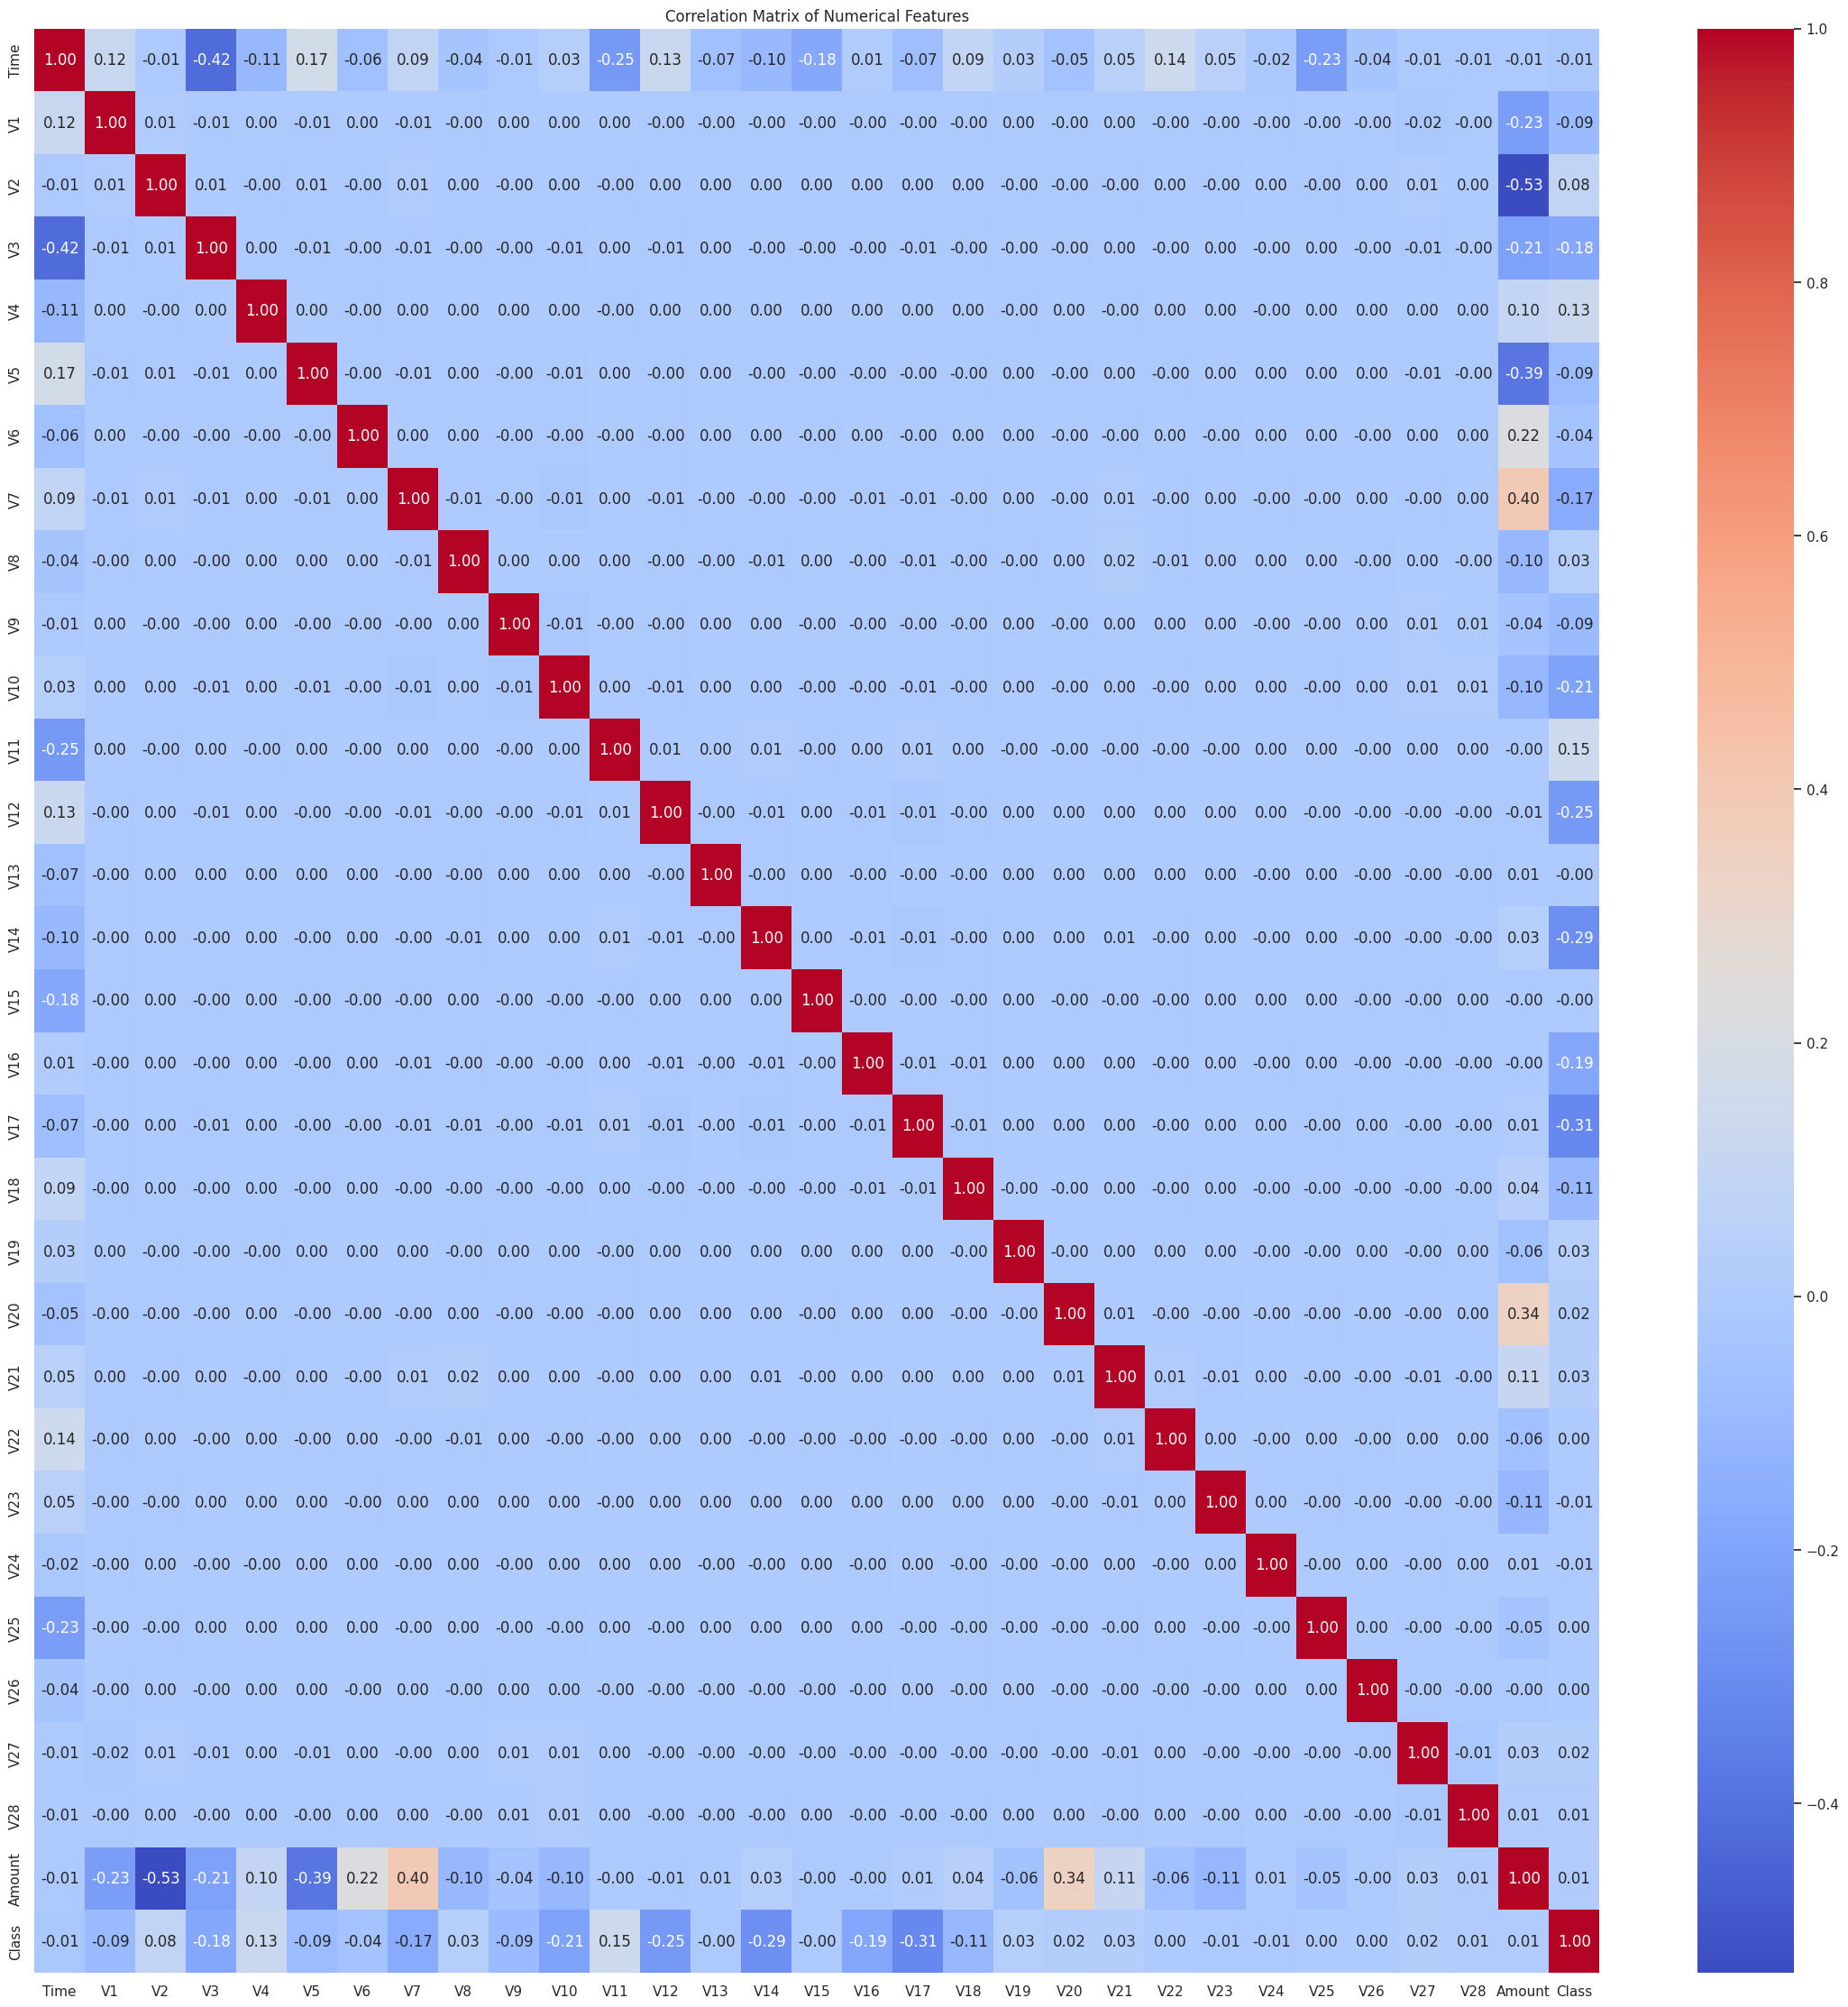

Highly correlated features to drop: set()
Updated dataset shape: (283726, 31)


In [25]:
correlation_matrix = cfd.corr()

plt.figure(figsize=(28, 28))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

threshold = 0.8
high_corr_features = set()
correlation_matrix = cfd.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

print("Highly correlated features to drop:", high_corr_features)

cfd.drop(columns=high_corr_features, inplace=True)
print(f"Updated dataset shape: {cfd.shape}")

In [26]:
cfd_scaled = cfd.copy()

scaler = StandardScaler()
cfd_scaled[['Amount']] = scaler.fit_transform(cfd_scaled[['Amount']])

time = cfd_scaled['Time']
cfd_scaled['Time'] = (time - time.min()) / (time.max() - time.min())

cfd_shuffled = cfd_scaled.sample(frac=1, random_state=1).copy()
cfd_shuffled

Time         V1        V2        V3        V4        V5        V6  \
206374  0.788150   2.138252  0.107755 -2.239845  0.268081  0.806938 -1.021402   
268206  0.943944   1.945257 -0.240130 -1.597900 -0.053622  0.857230  0.793447   
172110  0.700061   0.127616  0.998158 -0.419818 -0.550696  0.965433 -0.754179   
72879   0.317700  -1.441328  0.029736  1.393464 -0.263688  0.096911 -1.316177   
107135  0.406830 -10.138225 -7.293453 -0.554872  5.273460  3.199713 -1.657745   
...          ...        ...       ...       ...       ...       ...       ...   
134432  0.467649  -0.353659  1.114037  1.237025 -0.240452  0.437792 -0.381960   
243385  0.879178   2.054049 -0.172235 -1.259930  0.196180  0.071108 -0.637193   
100149  0.390250   0.227768 -1.317762 -0.034531  1.694434 -0.241255  1.711636   
55644   0.272281  -1.031848  0.857571  1.995305  2.056206  0.158225  0.112170   
240331  0.871313  -0.093703  1.243369 -0.576332 -0.646304  1.097949 -0.728643   

              V7        V8        V9  ...       V21       V22       V23  \
206374  0.690233 -0.436979  0.409922  ...  0.102738  0.493097 -0.075820   
268206 -0.154903  0.227288  0.430636  ...  0.348586  1.243589 -0.004671   
172110  0.931291 -0.071897 -0.020411  ... -0.338875 -0.831666  0.101180   
72879   1.759720 -0.299631 -0.989061  ... -0.133438 -1.060456  0.504534   
107135 -0.253983 -0.367764  0.715899  ... -2.850685  1.742938  6.286187   
...          ...       ...       ...  ...       ...       ...       ...   
134432  0.783789 -0.085263 -0.529211  ... -0.267663 -0.646169 -0.136025   
243385  0.012706 -0.108891  0.443272  ... -0.279186 -0.743420  0.279927   
100149 -0.196565  0.596369  0.981717  ...  0.232718  0.192697 -0.326877   
55644   0.576850 -0.081460 -0.342845  ... -0.072356  0.281748 -0.027174   
240331  1.015045 -0.151428 -0.006899  ... -0.376592 -0.806629  0.057438   

             V24       V25       V26       V27       V28    Amount  Class  
206374  0.517311  0.614399 -0.084702 -0.059037 -0.071152 -0.344261      0  
268206 -1.596683  0.089484  0.010718  0.028213 -0.085183 -0.349333      0  
172110  0.495130 -0.436632  0.119971  0.224111  0.083447 -0.345419      0  
72879   0.666864  0.377585  0.025808 -0.142720  0.080855  0.585175      0  
107135  0.235786  2.041837  0.872795  4.214939 -1.497558  0.054303      0  
...          ...       ...       ...       ...       ...       ...    ...  
134432 -0.440238 -0.039002  0.118929  0.271756  0.115267 -0.332720      0  
243385 -0.515988 -0.293390  0.210939 -0.080560 -0.076925 -0.349773      0  
100149 -1.042450  0.173426 -0.183919  0.061160  0.100956  1.220042      0  
55644   0.521069  0.063381 -0.095774 -0.930804 -0.752494 -0.337712      0  
240331  0.398293 -0.305056  0.126883  0.344895  0.140311 -0.329924      0  

[283726 rows x 31 columns]

In [27]:
x = cfd_shuffled.drop(columns=['Class'])
y = cfd_shuffled['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85        95
         1.0       1.00      0.65      0.79        95

    accuracy                           0.83       190
   macro avg       0.87      0.83      0.82       190
weighted avg       0.87      0.83      0.82       190

ROC AUC Score: 0.8263157894736842
AUPRC for Isolation Forest: 0.8263157894736842


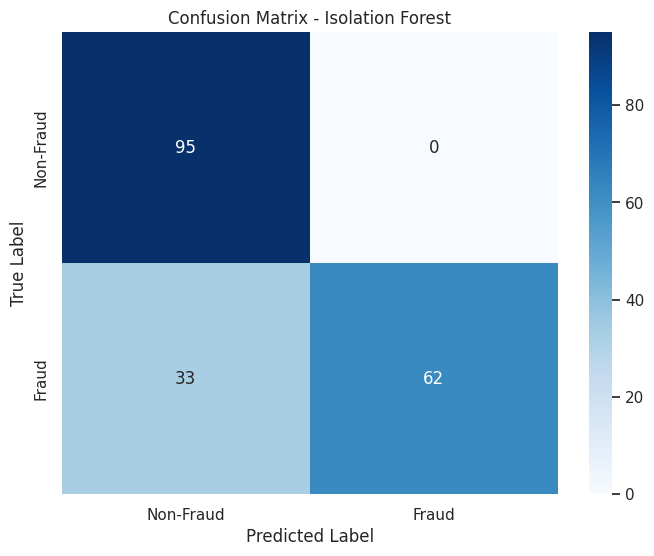

Cohen's Kappa for Isolation Forest: 0.6526315789473685


In [28]:
fraud_ratio = y_train.mean()
if_model = IsolationForest(contamination=0.02, random_state=101)
if_model.fit(x_train)

fraud_test = x_test[y_test == 1]
non_fraud_test = x_test[y_test == 0].sample(len(fraud_test), random_state=42)
x_test_balanced = pd.concat([fraud_test, non_fraud_test])
y_test_balanced = np.concatenate([np.ones(len(fraud_test)), np.zeros(len(non_fraud_test))])

if_y_pred = (if_model.predict(x_test_balanced) == -1).astype(int)
print(classification_report(y_test_balanced, if_y_pred))
if_roc_auc = roc_auc_score(y_test_balanced, if_y_pred)
print("ROC AUC Score:", if_roc_auc)
if_auprc = average_precision_score(y_test_balanced, if_y_pred)
print(f"AUPRC for Isolation Forest:", if_auprc)

report_dict = classification_report(y_test_balanced, if_y_pred, output_dict=True)

if_accuracy = report_dict['accuracy']
if_precision = report_dict['weighted avg']['precision']
if_recall = report_dict['weighted avg']['recall']
if_f1_score = report_dict['weighted avg']['f1-score']

if_cm = confusion_matrix(y_test_balanced, if_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(if_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix - Isolation Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

if_kappa = cohen_kappa_score(y_test_balanced, if_y_pred)
print(f"Cohen's Kappa for Isolation Forest: {if_kappa}")

Epoch 1/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9963 - val_loss: 0.8288
Epoch 2/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8404 - val_loss: 0.8131
Epoch 3/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8157 - val_loss: 0.8041
Epoch 4/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7912 - val_loss: 0.8007
Epoch 5/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7893 - val_loss: 0.7986
Epoch 6/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8049 - val_loss: 0.7962
Epoch 7/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7931 - val_loss: 0.7877
Epoch 8/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7810 - val_loss: 0.7842
Epoch 9/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7751 - val_loss: 0.7827
Epoch 10/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7760 - val_loss: 0.7810
Epoch 11/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7819 - val_loss: 0.7737
Epoch 12/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

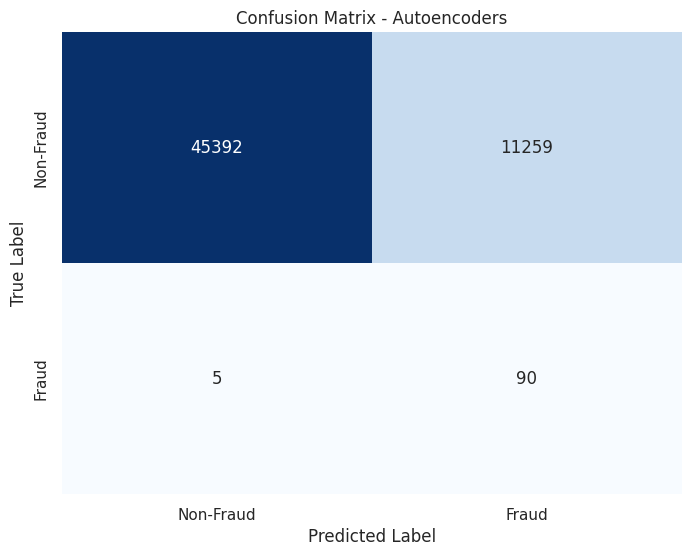

Cohen's Kappa for Autoencoders: 0.012449645915641572


In [29]:
y_train_fraud = y_train[y_train == 1].sample(frac=0.1, random_state=42)
x_train_fraud = x_train.loc[y_train_fraud.index]
x_train_auto = pd.concat([x_train[y_train == 0], x_train_fraud])

input_dim = x_train_auto.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(8, activation='relu')(encoded)

decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
autoencoder.fit(x_train_auto, x_train_auto, epochs=50, batch_size=256, shuffle=True, validation_split=0.2, callbacks=[early_stopping])

reconstructed = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - reconstructed, 2), axis=1)
threshold = np.percentile(mse, 80)

y_test_pred = (mse > threshold).astype(int)
print(classification_report(y_test, y_test_pred))
ae_roc_auc = roc_auc_score(y_test, y_test_pred)
print("ROC AUC Score:", ae_roc_auc)
ae_auprc = average_precision_score(y_test, y_test_pred)
print(f"AUPRC for Autoencoder:", ae_roc_auc)

report_dict2 = classification_report(y_test, y_test_pred, output_dict=True)

ae_accuracy = report_dict2['accuracy']
ae_precision = report_dict2['weighted avg']['precision']
ae_recall = report_dict2['weighted avg']['recall']
ae_f1_score = report_dict2['weighted avg']['f1-score']

ae_cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(ae_cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix - Autoencoders')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

ae_kappa = cohen_kappa_score(y_test, y_test_pred)
print(f"Cohen's Kappa for Autoencoders: {ae_kappa}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.05      0.63      0.10        95

    accuracy                           0.98     56746
   macro avg       0.53      0.81      0.54     56746
weighted avg       1.00      0.98      0.99     56746

ROC AUC Score: 0.8063015564365008
AUPRC for LOF: 0.03400421690289886


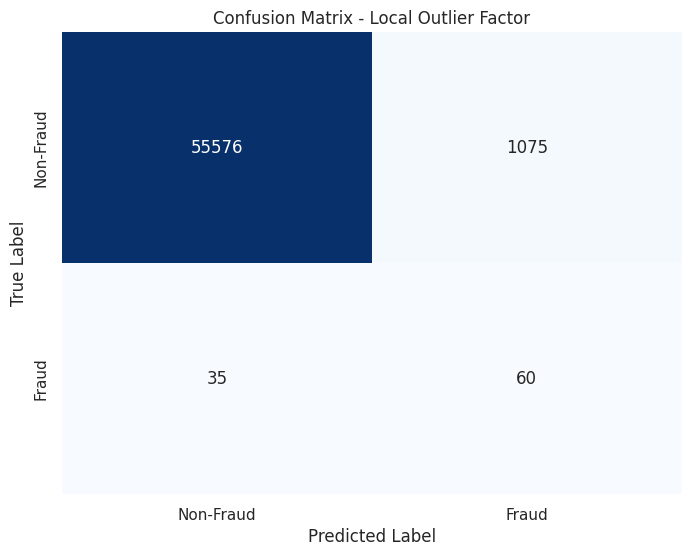

Cohen's Kappa for Local Outlier Factor: 0.09476411476370372


In [30]:
x_train_normal = x_train[y_train == 0]

lof_model = LocalOutlierFactor(n_neighbors=50, contamination=0.01, novelty=True)
lof_model.fit(x_train_normal)

lof_scores = lof_model.decision_function(x_test)
lof_threshold = np.percentile(lof_scores, 2)
y_test_pred_lof = (lof_scores < lof_threshold).astype(int)

print(classification_report(y_test, y_test_pred_lof))
lof_roc_auc = roc_auc_score(y_test, y_test_pred_lof)
print("ROC AUC Score:", lof_roc_auc)
lof_auprc = average_precision_score(y_test, y_test_pred_lof)
print("AUPRC for LOF:", lof_auprc)

report_dict3 = classification_report(y_test, y_test_pred_lof, output_dict=True)

lof_accuracy = report_dict3['accuracy']
lof_precision = report_dict3['weighted avg']['precision']
lof_recall = report_dict3['weighted avg']['recall']
lof_f1_score = report_dict3['weighted avg']['f1-score']


lof_cm = confusion_matrix(y_test, y_test_pred_lof)

plt.figure(figsize=(8, 6))
sns.heatmap(lof_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], cbar=False)
plt.title('Confusion Matrix - Local Outlier Factor')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

lof_kappa = cohen_kappa_score(y_test, y_test_pred_lof)
print(f"Cohen's Kappa for Local Outlier Factor: {lof_kappa}")


In [31]:
metrics_data = {
    'Model': ['Isolation Forest', 'Autoencoders', 'Local Outlier Factor'],
    'Accuracy': [if_accuracy, ae_accuracy, lof_accuracy],
    'Precision': [if_precision, ae_precision, lof_precision],
    'Recall': [if_recall, ae_recall, lof_recall],
    'F1-score': [if_f1_score, ae_f1_score, lof_f1_score],
    'AUC-ROC': [if_roc_auc, ae_roc_auc, lof_roc_auc],
    'AUPRC': [if_auprc, ae_auprc, lof_auprc]
}

metrics_df = pd.DataFrame(metrics_data)

metrics_df.head()

Model  Accuracy  Precision    Recall  F1-score   AUC-ROC  \
0      Isolation Forest  0.826316   0.871094  0.826316  0.820913  0.826316   
1          Autoencoders  0.801501   0.998229  0.801501  0.888158  0.874313   
2  Local Outlier Factor  0.980439   0.997786  0.980439  0.988618  0.806302   

      AUPRC  
0  0.826316  
1  0.007601  
2  0.034004

In [32]:
x_test[['Amount']] = scaler.transform(x_test[['Amount']])
x_test['Time'] = (x_test['Time'] - cfd_shuffled['Time'].min()) / (cfd_shuffled['Time'].max() - cfd_shuffled['Time'].min())

if_y_pred = (if_model.predict(x_test) == -1).astype(int)

mse = np.mean(np.power(x_test - autoencoder.predict(x_test), 2), axis=1)
best_threshold = np.percentile(mse, 90)
ae_y_pred = (mse > best_threshold).astype(int)

lof_scores = lof_model.decision_function(x_test)
lof_threshold = np.percentile(lof_scores, 5)
lof_y_pred = (lof_scores < lof_threshold).astype(int)

weights = [0.4, 0.4, 0.2]
ensemble_preds = np.average([if_y_pred, ae_y_pred, lof_y_pred], axis=0, weights=weights)
final_preds = (ensemble_preds > 0.4).astype(int)

print("Evaluation for Ensemble Model (Voting)")
print(classification_report(y_test, final_preds))
print(f"AUC-ROC Score: {roc_auc_score(y_test, final_preds):.4f}")
print(f"AUPRC Score: {average_precision_score(y_test, final_preds):.4f}")

1774/1774 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Evaluation for Ensemble Model (Voting)
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.85      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.91      0.55     56746
weighted avg       1.00      0.98      0.99     56746

AUC-ROC Score: 0.9148
AUPRC Score: 0.0501


<ipython-input-33-0425c98fecd1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='AUPRC', data=metrics_df, palette='viridis')  # Change y to 'AUPRC'


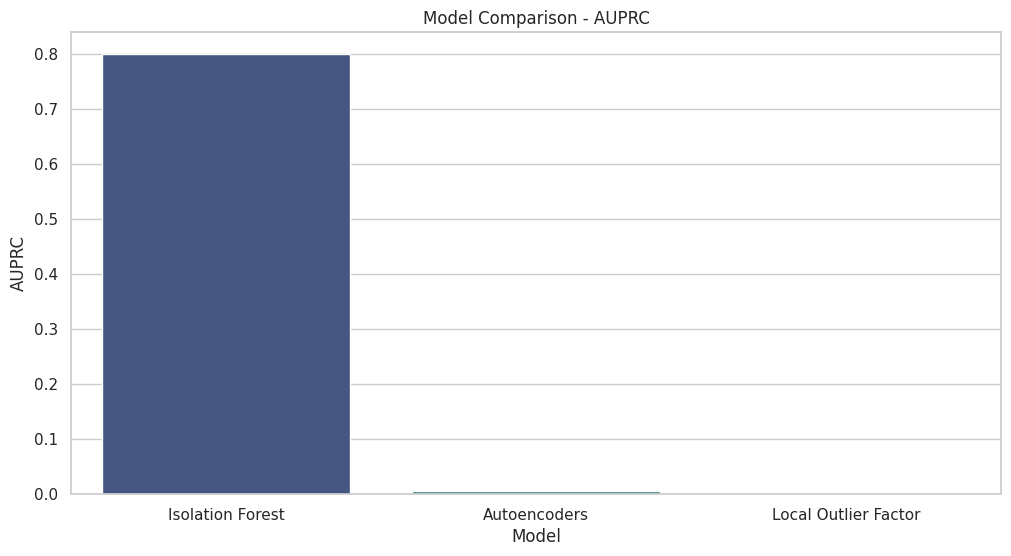

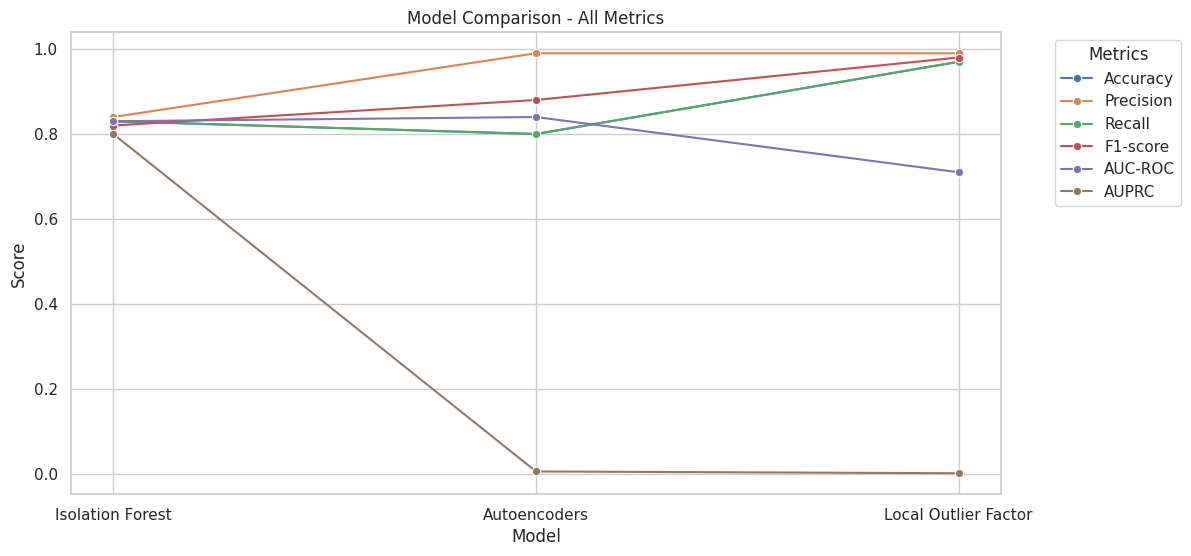

In [33]:
metrics_data = {
    'Model': ['Isolation Forest', 'Autoencoders', 'Local Outlier Factor'],
    'Accuracy': [0.83, 0.80, 0.97],
    'Precision': [0.84, 0.99, 0.99],
    'Recall': [0.83, 0.80, 0.97],
    'F1-score': [0.82, 0.88, 0.98],
    'AUC-ROC': [0.83, 0.84, 0.71],
    'AUPRC': [0.80, 0.006, 0.0018]
}

metrics_df = pd.DataFrame(metrics_data)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='AUPRC', data=metrics_df, palette='viridis')  # Change y to 'AUPRC'
plt.title('Model Comparison - AUPRC')  # Update title
plt.ylabel('AUPRC')  # Update y-axis label
plt.xlabel('Model')
plt.show()

plt.figure(figsize=(12, 6))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC', 'AUPRC']:  # Include 'AUPRC'
    sns.lineplot(x='Model', y=metric, data=metrics_df, label=metric, marker='o')

plt.title('Model Comparison - All Metrics')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [34]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    x_train.values, feature_names=x_train.columns.tolist(),
    class_names=['Non-Fraud', 'Fraud'], verbose=True, mode='classification'
)

In [35]:
def iforest_predict_proba(X):
    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X, columns=x_train.columns)

    scores = if_model.decision_function(X)
    probs = (scores - scores.min()) / (scores.max() - scores.min())
    return np.vstack([1 - probs, probs]).T

idx = np.random.randint(0, x_test.shape[0])
exp = explainer.explain_instance(x_test.iloc[idx].values, iforest_predict_proba)

exp.show_in_notebook()

feature_importances = []
for _ in range(5):
    exp = explainer.explain_instance(x_test.iloc[0].values, iforest_predict_proba)
    feature_importances.extend(exp.as_list())

feature_importance_df = pd.DataFrame(feature_importances, columns=['feature', 'importance'])
avg_feature_importance_df = feature_importance_df.groupby('feature')['importance'].mean().reset_index()
display(avg_feature_importance_df.style.hide(axis='index'))

Intercept 0.539216279460826
Prediction_local [0.59959359]
Right: 0.900091056204624


Intercept 0.6893142909132337
Prediction_local [0.34265735]
Right: 0.2782737657245354
Intercept 0.6490696349601736
Prediction_local [0.33479253]
Right: 0.2353019224709176
Intercept 0.6629962330001828
Prediction_local [0.3754271]
Right: 0.2607081343182333
Intercept 0.6595511839598582
Prediction_local [0.24973263]
Right: 0.1846582477380186
Intercept 0.7203783820500851
Prediction_local [0.2738358]
Right: 0.2628412611725778


In [36]:
def autoencoder_predict_proba(X):
    reconstructed = autoencoder.predict(X)
    mse = np.mean(np.power(X - reconstructed, 2), axis=1)
    min_mse, max_mse = mse.min(), mse.max()
    probs = (mse - min_mse) / (max_mse - min_mse)
    return np.vstack([1 - probs, probs]).T

idx = np.random.randint(0, x_test.shape[0])
exp2 = explainer.explain_instance(x_test.iloc[idx].values, autoencoder_predict_proba)

exp2.show_in_notebook()

feature_importances = []
for _ in range(5):
    exp2 = explainer.explain_instance(x_test.iloc[0].values, autoencoder_predict_proba)
    feature_importances.extend(exp.as_list())

feature_importance_df = pd.DataFrame(feature_importances, columns=['feature', 'importance'])
avg_feature_importance_df = feature_importance_df.groupby('feature')['importance'].mean().reset_index()
display(avg_feature_importance_df.style.hide(axis='index'))

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step
Intercept 0.15431200537960427
Prediction_local [0.29159962]
Right: 0.1440318858244779


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Intercept 0.18438198781451937
Prediction_local [0.33609519]
Right: 0.3462516301721575
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Intercept 0.19258123928821452
Prediction_local [0.38904648]
Right: 0.3726265894795435
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Intercept 0.1607063095691162
Prediction_local [0.34883943]
Right: 0.32617114345497
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step
Intercept 0.18201851084058346
Prediction_local [0.36235251]
Right: 0.34838483625416977
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Intercept 0.18857386251080654
Prediction_local [0.31516688]
Right: 0.33643002660382226


In [37]:
def lof_predict_proba(X):
    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X, columns=x_train.columns)
    lof_scores = lof_model._predict(X)
    probs = (lof_scores + 1) / 2
    return np.vstack([1 - probs, probs]).T

idx = np.random.randint(0, x_test.shape[0])
exp3 = explainer.explain_instance(x_test.iloc[idx].values, lof_predict_proba)

exp3.show_in_notebook()

feature_importances = []
for _ in range(5):
    exp3 = explainer.explain_instance(x_test.iloc[0].values, lof_predict_proba)
    feature_importances.extend(exp.as_list())

feature_importance_df = pd.DataFrame(feature_importances, columns=['feature', 'importance'])
avg_feature_importance_df = feature_importance_df.groupby('feature')['importance'].mean().reset_index()
display(avg_feature_importance_df.style.hide(axis='index'))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Intercept 0.4420406793060362
Prediction_local [0.17118447]
Right: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Intercept 0.19132613015892053
Prediction_local [0.89932889]
Right: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Intercept 0.20190886279377498
Prediction_local [0.90740854]
Right: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Intercept 0.22975693520164073
Prediction_local [0.78488146]
Right: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Intercept 0.18518817080242203
Prediction_local [0.92017613]
Right: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Intercept 0.19386427454838256
Prediction_local [0.91795136]
Right: 1.0


In [38]:
metrics_data['Cohen\'s Kappa'] = [if_kappa, ae_kappa, lof_kappa]
metrics_df = pd.DataFrame(metrics_data)

metrics_df

Model  Accuracy  Precision  Recall  F1-score  AUC-ROC  \
0      Isolation Forest      0.83       0.84    0.83      0.82     0.83   
1          Autoencoders      0.80       0.99    0.80      0.88     0.84   
2  Local Outlier Factor      0.97       0.99    0.97      0.98     0.71   

    AUPRC  Cohen's Kappa  
0  0.8000       0.652632  
1  0.0060       0.012450  
2  0.0018       0.094764

In [40]:
def predict_fraud(input_data):
    decision_score = if_model.decision_function(input_data)
    fraud_prediction = (decision_score < 0).astype(int)[0]  # Adjusted threshold
    return "Fraudulent" if fraud_prediction == 1 else "Non-Fraudulent"


In [41]:
def fraudulent_data():
    time = 100000
    amount = 5000.00
    v_values = [-5.64, -7.27, -4.83, -5.68, -1.14, -2.62, -4.36, -7.32, -1.34, -0.02, 0.28, -0.23, -0.64, 0.10, 0.17, 0.13, -0.01, 0.01, -0.11, 0.07, 0.13, -0.19, 0.13, -0.02, 0.13, -0.19, 0.13, -0.02]
    if len(v_values) == 28:
        return pd.DataFrame([[time, amount] + v_values], columns=['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)])
    else:
        print("Error: v_values does not contain 28 elements")

input_data = fraudulent_data()
input_data[['Amount']] = scaler.transform(input_data[['Amount']])  # Apply same scaling
input_data['Time'] = (input_data['Time'] - cfd_shuffled['Time'].min()) / (cfd_shuffled['Time'].max() - cfd_shuffled['Time'].min())
input_data = input_data[x_train.columns]  # Ensure correct feature order

print("Transaction Prediction:", predict_fraud(input_data))

Transaction Prediction: Fraudulent


In [42]:
def non_fraudulent_data():
    time = 50000
    amount = 50.00
    v_values = [-1.36, -0.07, 2.54, 1.38, -0.34, 0.46, 0.24, 0.10, 0.36, -0.02, 0.28, -0.23, -0.64, 0.10, 0.17, 0.13, -0.01, 0.01, -0.11, 0.07, 0.13, -0.19, 0.13, -0.02, 0.13, -0.19, 0.13, -0.02]
    if len(v_values) == 28:
        return pd.DataFrame([[time, amount] + v_values], columns=['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)])
    else:
        print("Error: v_values does not contain 28 elements")

input_data2 = non_fraudulent_data()
input_data2[['Amount']] = scaler.transform(input_data2[['Amount']])  # Apply same scaling
input_data2['Time'] = (input_data2['Time'] - cfd_shuffled['Time'].min()) / (cfd_shuffled['Time'].max() - cfd_shuffled['Time'].min())
input_data2 = input_data2[x_train.columns]  # Ensure correct feature order

print("Transaction Prediction:", predict_fraud(input_data2))

Transaction Prediction: Non-Fraudulent


In [43]:
def ae_predict_fraud(input_data):
    reconstructed = autoencoder.predict(input_data)
    mse = np.mean(np.power(input_data - reconstructed, 2), axis=1)
    fraud_prediction = (mse > threshold).astype(int)[0]
    return "Fraudulent" if fraud_prediction == 1 else "Non-Fraudulent"

In [44]:
def fraudulent_data():
    time = 100000
    amount = 5000.00
    v_values = [-5.64, -7.27, -4.83, -5.68, -1.14, -2.62, -4.36, -7.32, -1.34, -0.02, 0.28, -0.23, -0.64, 0.10, 0.17, 0.13, -0.01, 0.01, -0.11, 0.07, 0.13, -0.19, 0.13, -0.02, 0.13, -0.19, 0.13, -0.02]
    if len(v_values) == 28:
        return pd.DataFrame([[time, amount] + v_values], columns=['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)])
    else:
        print("Error: v_values does not contain 28 elements")

input_data3 = fraudulent_data()
input_data3[['Amount']] = scaler.transform(input_data3[['Amount']])  # Apply same scaling
input_data3['Time'] = (input_data3['Time'] - cfd_shuffled['Time'].min()) / (cfd_shuffled['Time'].max() - cfd_shuffled['Time'].min())
input_data3 = input_data3[x_train.columns]  # Ensure correct feature order

print("Transaction Prediction:", ae_predict_fraud(input_data3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Transaction Prediction: Fraudulent


In [45]:
def non_fraudulent_data():
    time = 50000
    amount = 50.00
    v_values = [-1.36, -0.07, 2.54, 1.38, -0.34, 0.46, 0.24, 0.10, 0.36, -0.02, 0.28, -0.23, -0.64, 0.10, 0.17, 0.13, -0.01, 0.01, -0.11, 0.07, 0.13, -0.19, 0.13, -0.02, 0.13, -0.19, 0.13, -0.02]
    if len(v_values) == 28:
        return pd.DataFrame([[time, amount] + v_values], columns=['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)])
    else:
        print("Error: v_values does not contain 28 elements")

input_data4 = non_fraudulent_data()
input_data4[['Amount']] = scaler.transform(input_data4[['Amount']])  # Apply same scaling
input_data4['Time'] = (input_data4['Time'] - cfd_shuffled['Time'].min()) / (cfd_shuffled['Time'].max() - cfd_shuffled['Time'].min())
input_data4 = input_data4[x_train.columns]  # Ensure correct feature order

print("Transaction Prediction:", ae_predict_fraud(input_data4))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Transaction Prediction: Fraudulent


In [46]:
def lof_predict_fraud(input_data):
    input_data[['Amount']] = scaler.transform(input_data[['Amount']])  # Apply same scaling to new transactions
    input_data['Time'] = (input_data['Time'] - cfd_shuffled['Time'].min()) / (cfd_shuffled['Time'].max() - cfd_shuffled['Time'].min() + 1e-6)  # Ensure Time normalization
    lof_score = lof_model.decision_function(input_data)
    fraud_prediction = (lof_score < lof_threshold).astype(int)[0]
    return "Fraudulent" if fraud_prediction == 1 else "Non-Fraudulent"

In [47]:
def fraudulent_data():
    time = 100000
    amount = 5000.00
    v_values = [-5.64, -7.27, -4.83, -5.68, -1.14, -2.62, -4.36, -7.32, -1.34, -0.02, 0.28, -0.23, -0.64, 0.10, 0.17, 0.13, -0.01, 0.01, -0.11, 0.07, 0.13, -0.19, 0.13, -0.02, 0.13, -0.19, 0.13, -0.02]
    if len(v_values) == 28:
        return pd.DataFrame([[time, amount] + v_values], columns=['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)])
    else:
        print("Error: v_values does not contain 28 elements")

input_data5 = fraudulent_data()
input_data5[['Amount']] = scaler.transform(input_data5[['Amount']])  # Apply same scaling
input_data5['Time'] = (input_data5['Time'] - cfd_shuffled['Time'].min()) / (cfd_shuffled['Time'].max() - cfd_shuffled['Time'].min())
input_data5 = input_data5[x_train.columns]  # Ensure correct feature order

print("Transaction Prediction:", lof_predict_fraud(input_data5))

Transaction Prediction: Fraudulent


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [48]:
def non_fraudulent_data():
    time = 50000
    amount = 50.00
    v_values = [-1.36, -0.07, 2.54, 1.38, -0.34, 0.46, 0.24, 0.10, 0.36, -0.02, 0.28, -0.23, -0.64, 0.10, 0.17, 0.13, -0.01, 0.01, -0.11, 0.07, 0.13, -0.19, 0.13, -0.02, 0.13, -0.19, 0.13, -0.02]
    if len(v_values) == 28:
        return pd.DataFrame([[time, amount] + v_values], columns=['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)])
    else:
        print("Error: v_values does not contain 28 elements")

input_data6 = non_fraudulent_data()
input_data6[['Amount']] = scaler.transform(input_data6[['Amount']])  # Apply same scaling
input_data6['Time'] = (input_data6['Time'] - cfd_shuffled['Time'].min()) / (cfd_shuffled['Time'].max() - cfd_shuffled['Time'].min())
input_data6 = input_data6[x_train.columns]  # Ensure correct feature order

print("Transaction Prediction:", lof_predict_fraud(input_data6))

Transaction Prediction: Fraudulent


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
